In [1]:
import polars as pl
import pandas as pd

In [2]:
report_card = pl.read_excel('data_sources/Illinois-Student-Growth-2025-Cohort-vs-Baseline.xlsx', sheet_id = 1)

In [3]:
report_card_x = pd.read_excel('data_sources/2025-Report-Card-Public-Data-Set.xlsx', sheet_name='General')

In [4]:
column_list = report_card_x.columns.to_list()

for col in column_list: 
    print(col)

DestinationTable
RCDTS
Level
School Name
District
City
County
District Type
School Type
Grades Served
Summative Designation
Summative Designation: Student Group(s)
Title I Status
State Senate District
State House District
# Student Enrollment
% Student Enrollment -Male
% Student Enrollment - Female
% Student Enrollment - Non-binary
% Student Enrollment - White
% Student Enrollment - Black or African American
% Student Enrollment - Hispanic or Latino
% Student Enrollment - Asian
% Student Enrollment - Native Hawaiian or Other Pacific Islander
% Student Enrollment - American Indian or Alaska Native
% Student Enrollment - Two or More Races
% Student Enrollment - Middle Eastern or North African
% Student Enrollment - Children with Disabilities
% Student Enrollment - IEP
% Student Enrollment - EL
% Student Enrollment - Former EL
% Student Enrollment - Never EL
% Student Enrollment - Low Income
% Student Enrollment - Homeless
% Student Enrollment - Youth in Care
% Student Enrollment - Migran

In [5]:
# Filtering the dataset

# Variables that we are filtering on:
    # District
    # Level
    # RCDTS
    # School Name
    # School Type
    # 

#lst_of_rel_vars = ["District", "Level", "RCDTS", "School Name", "School Type"]

In [10]:
subset_data = report_card_x#[lst_of_rel_vars]

In [11]:
subset_data.head(10)

,DestinationTable,RCDTS,Level,School Name,District,City,County,District Type,School Type,Grades Served,...,% Students who are identified as Accelerated for Science Only - Two or More Races,% Students who are identified as Accelerated for Science Only - MENA,% Students who are identified as Accelerated for Science Only - CWD,% Students who are identified as Accelerated for Science Only - EL,% Students who are identified as Accelerated for Science Only - IEP,% Students who are identified as Accelerated for Science Only - LowIncome,% Students who are identified as Accelerated for Science Only - Homeless,# Students who are identified as Accelerated for Single Subject - All,# Students who are identified as Accelerated for Single Subject - Male,# Students who are identified as Accelerated for Single Subject - Female
0,General1,65-000-0000-80-0000,Statewide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,0.2,0.1,0.1,0.1,0.1,0.1,29875,15630,14237
1,General1,01-009-2620-26-0000,District,NaN,A-C Central CUSD 262,Ashland,Cass,Unit District,NaN,NaN,...,*,NaN,*,*,*,*,*,*,*,*
2,General1,01-009-2620-26-2001,School,A-C Central Elementary School,A-C Central CUSD 262,Chandlerville,Cass,Unit District,Elementary School,PK - 4,...,*,NaN,*,NaN,*,*,*,*,*,*
3,General1,01-009-2620-26-0002,School,A-C Central High School,A-C Central CUSD 262,Ashland,Cass,Unit District,High School,9 - 12,...,*,NaN,*,*,*,*,*,*,*,*
4,General1,01-009-2620-26-1002,School,A-C Central Middle School,A-C Central CUSD 262,Ashland,Cass,Unit District,Middle/Junior High School,5 - 8,...,*,NaN,*,*,*,*,*,*,*,*
5,General1,33-048-2760-26-0000,District,NaN,Abingdon-Avon CUSD 276,Abingdon,Knox,Unit District,NaN,NaN,...,*,NaN,*,NaN,*,*,*,*,*,*
6,General1,33-048-2760-26-0001,School,Abingdon-Avon High Sch,Abingdon-Avon CUSD 276,Abingdon,Knox,Unit District,High School,9 - 12,...,*,NaN,*,NaN,*,*,*,*,*,*
7,General1,33-048-2760-26-1001,School,Abingdon-Avon Middle Sch,Abingdon-Avon CUSD 276,Avon,Knox,Unit District,Middle/Junior High School,6 - 8,...,*,NaN,*,NaN,*,*,*,*,*,*
8,General1,33-048-2760-26-2002,School,Avon Elem Sch,Abingdon-Avon CUSD 276,Avon,Knox,Unit District,Elementary School,PK - 1,...,NaN,NaN,*,NaN,*,*,*,*,*,*
9,General1,33-048-2760-26-2001,School,Hedding Grade Sch,Abingdon-Avon CUSD 276,Abingdon,Knox,Unit District,Elementary School,PK - 5,...,*,NaN,*,NaN,*,*,*,*,*,*


In [12]:
# Filtering the data

filtered_data = subset_data[(subset_data['District'] == "Chicago Public Schools District 299") & 
                            (subset_data['School Type'] == "Elementary School") | 
                            (subset_data['School Type'] == "Middle/Junior High School") ]

In [13]:
filtered_data

,DestinationTable,RCDTS,Level,School Name,District,City,County,District Type,School Type,Grades Served,...,% Students who are identified as Accelerated for Science Only - Two or More Races,% Students who are identified as Accelerated for Science Only - MENA,% Students who are identified as Accelerated for Science Only - CWD,% Students who are identified as Accelerated for Science Only - EL,% Students who are identified as Accelerated for Science Only - IEP,% Students who are identified as Accelerated for Science Only - LowIncome,% Students who are identified as Accelerated for Science Only - Homeless,# Students who are identified as Accelerated for Single Subject - All,# Students who are identified as Accelerated for Single Subject - Male,# Students who are identified as Accelerated for Single Subject - Female
4,General1,01-009-2620-26-1002,School,A-C Central Middle School,A-C Central CUSD 262,Ashland,Cass,Unit District,Middle/Junior High School,5 - 8,...,*,NaN,*,*,*,*,*,*,*,*
7,General1,33-048-2760-26-1001,School,Abingdon-Avon Middle Sch,Abingdon-Avon CUSD 276,Avon,Knox,Unit District,Middle/Junior High School,6 - 8,...,*,NaN,*,NaN,*,*,*,*,*,*
17,General1,19-022-0040-02-1009,School,Indian Trail Jr High School,Addison SD 4,Addison,Dupage,Elementary District,Middle/Junior High School,6 - 8,...,*,*,*,*,*,*,*,*,*,*
31,General1,44-063-0190-24-1001,School,Alden-Hebron Middle School,Alden Hebron SD 19,Hebron,McHenry,Unit District,Middle/Junior High School,6 - 8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,General1,07-016-1260-02-1005,School,Prairie Jr High School,Alsip-Hazlgrn-Oaklwn SD 126,Alsip,Cook,Elementary District,Middle/Junior High School,7 - 8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*,NaN,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,General1,07-016-1270-02-1005,School,Worth Jr High School,Worth SD 127,Worth,Cook,Elementary District,Middle/Junior High School,6 - 8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4676,General1,24-047-1150-26-1001,School,Yorkville Middle School,Yorkville CUSD 115,Yorkville,Kendall,Unit District,Middle/Junior High School,7 - 8,...,*,NaN,*,*,*,*,*,*,*,*
4680,General1,21-028-1880-26-1001,School,Zeigler-Royalton Jr High School,Zeigler-Royalton CUSD 188,Zeigler,Franklin,Unit District,Middle/Junior High School,6 - 8,...,*,NaN,NaN,NaN,NaN,*,NaN,*,NaN,*
4686,General1,34-049-0060-02-1002,School,Shiloh Park Middle School,Zion ESD 6,Zion,Lake,Elementary District,Middle/Junior High School,6 - 8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import geopandas as gpd
import matplotlib as mp

In [15]:
gdf = gpd.read_file("data_sources/shapefiles_geolocations/Boundaries - ZIP Codes_20251108/geo_export_a5ffe9d6-b91f-4571-9247-a1295cf2f752.shp")

In [16]:
print(gdf.head())


   objectid    zip    shape_area     shape_len  \
0       1.0  60607  6.466429e+07  39143.640073   
1       2.0  60661  9.357756e+06  13132.565918   
2       3.0  60606  6.766411e+06  12040.439961   
3       4.0  60615  6.656545e+07  38321.313270   
4       5.0  60643  2.077062e+08  75254.730124   

                                            geometry  
0  POLYGON ((-87.6474 41.88315, -87.6474 41.88296...  
1  POLYGON ((-87.64081 41.88908, -87.64068 41.889...  
2  POLYGON ((-87.63696 41.88906, -87.63696 41.889...  
3  POLYGON ((-87.58103 41.80421, -87.58089 41.804...  
4  MULTIPOLYGON (((-87.66326 41.7212, -87.66326 4...  


<Axes: >

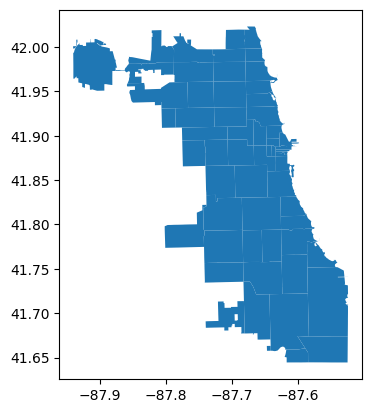

In [17]:
gdf.plot()

In [18]:
# Importing the directory excel to formulate the RCDTS code

directory_df = pd.read_excel('data_sources/dir_ed_entities.xls', sheet_name='1 Public Dist & Sch')

In [19]:
directory_df.head()

,CountyName,RecType,Region-2\nCounty-3\nDistrict-4,Type,School,FacilityName,Administrator,Mailing Address,Delivery Address,City,Zip,Telephone,GradeServed,StRep,StSen,FedCong,Cat,NCES ID,Website,LastUpdated
0,Adams,Dist,010010010,26,0000,Payson CUSD 1,Dr. Donna Veile,406 W State St,NaN,Payson,62360 1041,217-656-3323,P-12,100,50,15,2,1730990,http://www.cusd1.org,20251104 05:00:06
1,Adams,Sch,010010010,26,0001,Seymour High School,Mr. Greg Buescher,420 W Brainard St,NaN,Payson,62360 1033,217-656-3355,7-12,100,50,15,4,173099003226,http://www.cusd1.org,20251104 05:00:06
2,Adams,Sch,010010010,26,2002,Seymour Elementary School,Ms. Julie Phelan,404 W State St,NaN,Payson,62360 1041,217-656-3323,P-6,100,50,15,4,173099003225,NaN,20251104 05:00:06
3,Adams,Dist,010010020,26,0000,Liberty CUSD 2,Dr. Kelle Bunch,505 N Park St,NaN,Liberty,62347 1107,217-645-3433,P-12,100,50,15,2,1722770,http://www.libertyschool.net,20251104 05:00:06
4,Adams,Sch,010010020,26,0001,Liberty High School,Ms. Kimberly Harrison,505 N Park St,NaN,Liberty,62347 1107,217-645-3433,6-12,100,50,15,4,172277002524,http://www.libertyschool.net,20251104 05:00:06


In [20]:
vars_to_keep = ["CountyName", "Region-2\nCounty-3\nDistrict-4", "Type", "School", "FacilityName", "City", "Zip"]
subset_dir_df = directory_df[vars_to_keep]


In [30]:
subset_dir_df_new = subset_dir_df.rename(columns={"Region-2\nCounty-3\nDistrict-4": "RCD"})

In [31]:
subset_dir_df_new[["RCD", "Type", "School"]] = subset_dir_df_new[["RCD", "Type", "School"]].astype(str)

In [32]:
subset_dir_df_new["comb_rcdts"] = subset_dir_df_new["RCD"] + subset_dir_df_new["Type"] + subset_dir_df_new["School"]

In [33]:
subset_dir_df_new.head()

,CountyName,RCD,Type,School,FacilityName,City,Zip,comb_rcdts
0,Adams,010010010,26,0000,Payson CUSD 1,Payson,62360 1041,010010010260000
1,Adams,010010010,26,0001,Seymour High School,Payson,62360 1033,010010010260001
2,Adams,010010010,26,2002,Seymour Elementary School,Payson,62360 1041,010010010262002
3,Adams,010010020,26,0000,Liberty CUSD 2,Liberty,62347 1107,010010020260000
4,Adams,010010020,26,0001,Liberty High School,Liberty,62347 1107,010010020260001


In [34]:
subset_dir_df_new["zip_clean"] = subset_dir_df_new["Zip"].astype(str).str.extract(r"^\s*(\d{5})")

In [35]:
report_card_x.head()
filtered_data["RCDTS_clean"] = filtered_data["RCDTS"].astype(str).str.replace("-", "")

/var/folders/ly/t4ldpdyn4297l81_j_15fl2w0000gn/T/ipykernel_61451/1434513727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["RCDTS_clean"] = filtered_data["RCDTS"].astype(str).str.replace("-", "")


In [36]:
filtered_data.head()

,DestinationTable,RCDTS,Level,School Name,District,City,County,District Type,School Type,Grades Served,...,% Students who are identified as Accelerated for Science Only - MENA,% Students who are identified as Accelerated for Science Only - CWD,% Students who are identified as Accelerated for Science Only - EL,% Students who are identified as Accelerated for Science Only - IEP,% Students who are identified as Accelerated for Science Only - LowIncome,% Students who are identified as Accelerated for Science Only - Homeless,# Students who are identified as Accelerated for Single Subject - All,# Students who are identified as Accelerated for Single Subject - Male,# Students who are identified as Accelerated for Single Subject - Female,RCDTS_clean
4,General1,01-009-2620-26-1002,School,A-C Central Middle School,A-C Central CUSD 262,Ashland,Cass,Unit District,Middle/Junior High School,5 - 8,...,NaN,*,*,*,*,*,*,*,*,010092620261002
7,General1,33-048-2760-26-1001,School,Abingdon-Avon Middle Sch,Abingdon-Avon CUSD 276,Avon,Knox,Unit District,Middle/Junior High School,6 - 8,...,NaN,*,NaN,*,*,*,*,*,*,330482760261001
17,General1,19-022-0040-02-1009,School,Indian Trail Jr High School,Addison SD 4,Addison,Dupage,Elementary District,Middle/Junior High School,6 - 8,...,*,*,*,*,*,*,*,*,*,190220040021009
31,General1,44-063-0190-24-1001,School,Alden-Hebron Middle School,Alden Hebron SD 19,Hebron,McHenry,Unit District,Middle/Junior High School,6 - 8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440630190241001
40,General1,07-016-1260-02-1005,School,Prairie Jr High School,Alsip-Hazlgrn-Oaklwn SD 126,Alsip,Cook,Elementary District,Middle/Junior High School,7 - 8,...,NaN,NaN,NaN,NaN,NaN,NaN,*,NaN,*,070161260021005


In [37]:
rel_zips = ["60621", "60636", "60619", "60620", "60623", "60624", "60647", "60651"]

subset_dir_df_new = subset_dir_df_new[subset_dir_df_new["zip_clean"].isin(rel_zips)]

In [38]:
subset_dir_df_new.head()

,CountyName,RCD,Type,School,FacilityName,City,Zip,comb_rcdts,zip_clean
1484,Cook,150162990,25,0011,Farragut Career Academy HS,Chicago,60623 3217,150162990250011,60623
1490,Cook,150162990,25,0019,Hirsch Metropolitan High School,Chicago,60619 3207,150162990250019,60619
1499,Cook,150162990,25,0029,Marshall Metropolitan High School,Chicago,60624 2901,150162990250029,60624
1517,Cook,150162990,25,010C,Urban Prep Chtr Acad Englewood HS,Chicago,60621 3247,15016299025010C,60621
1521,Cook,150162990,25,019C,Legal Prep Academy Charter HS,Chicago,60624 2232,15016299025019C,60624


In [40]:
varss = ["comb_rcdts", "zip_clean"]
subset_dir_df_new = subset_dir_df_new[varss]


In [41]:
subset_dir_df_new.head()

,comb_rcdts,zip_clean
1484,150162990250011,60623
1490,150162990250019,60619
1499,150162990250029,60624
1517,15016299025010C,60621
1521,15016299025019C,60624


In [42]:
subset_dir_df_new = subset_dir_df_new.rename(columns={"comb_rcdts": "RCDTS_clean"})

In [43]:
subset_dir_df_new.head()

,RCDTS_clean,zip_clean
1484,150162990250011,60623
1490,150162990250019,60619
1499,150162990250029,60624
1517,15016299025010C,60621
1521,15016299025019C,60624


In [44]:
subset_dir_df_new['RCDTS_clean'] = subset_dir_df_new['RCDTS_clean'].astype(str)

In [45]:
filtered_data['RCDTS_clean'] = filtered_data['RCDTS_clean'].astype(str) 

/var/folders/ly/t4ldpdyn4297l81_j_15fl2w0000gn/T/ipykernel_61451/834952643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['RCDTS_clean'] = filtered_data['RCDTS_clean'].astype(str)


In [46]:
filtered_data['RCDTS_clean'] = filtered_data['RCDTS_clean'].astype(str)
subset_dir_df_new['RCDTS_clean'] = subset_dir_df_new['RCDTS_clean'].astype(str)

#merged_df = filtered_data.join(subset_dir_df_new.set_index('RCDTS_clean'), on='RCDTS_clean', how='inner')

/var/folders/ly/t4ldpdyn4297l81_j_15fl2w0000gn/T/ipykernel_61451/1801237700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['RCDTS_clean'] = filtered_data['RCDTS_clean'].astype(str)


In [47]:
merged_df = filtered_data.join(subset_dir_df_new.set_index('RCDTS_clean'), on='RCDTS_clean', how='inner')

In [48]:
merged_df.head()

,DestinationTable,RCDTS,Level,School Name,District,City,County,District Type,School Type,Grades Served,...,% Students who are identified as Accelerated for Science Only - CWD,% Students who are identified as Accelerated for Science Only - EL,% Students who are identified as Accelerated for Science Only - IEP,% Students who are identified as Accelerated for Science Only - LowIncome,% Students who are identified as Accelerated for Science Only - Homeless,# Students who are identified as Accelerated for Single Subject - All,# Students who are identified as Accelerated for Single Subject - Male,# Students who are identified as Accelerated for Single Subject - Female,RCDTS_clean,zip_clean
697,General1,15-016-2990-25-2437,School,Ashe Elem School,Chicago Public Schools District 299,Chicago,Cook,Unit District,Elementary School,PK - 8,...,*,NaN,*,*,NaN,*,*,*,150162990252437,60619
704,General1,15-016-2990-25-2063,School,Avalon Park Elem School,Chicago Public Schools District 299,Chicago,Cook,Unit District,Elementary School,PK - 8,...,NaN,NaN,NaN,*,NaN,*,*,*,150162990252063,60619
710,General1,15-016-2990-25-2068,School,Barton Elem School,Chicago Public Schools District 299,Chicago,Cook,Unit District,Elementary School,PK - 8,...,*,NaN,*,*,NaN,*,*,*,150162990252068,60620
711,General1,15-016-2990-25-2069,School,Bass Elem School,Chicago Public Schools District 299,Chicago,Cook,Unit District,Elementary School,PK - 8,...,NaN,NaN,NaN,*,*,*,*,*,150162990252069,60621
726,General1,15-016-2990-25-2088,School,Bond Elem School,Chicago Public Schools District 299,Chicago,Cook,Unit District,Elementary School,PK - 8,...,*,NaN,*,*,*,*,*,*,150162990252088,60621
